In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
warnings.filterwarnings("ignore")

### EDA

In [15]:
data = pd.read_csv("data/insurance.csv")
df = pd.DataFrame(data)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### DATA INFORMATION

In [16]:
df.shape

(1338, 7)

In [17]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### INFO ABOUT COLS

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### DISTRIBUTION CHECK

In [21]:
numeric_cols = ['age', 'bmi', 'children', 'charges']

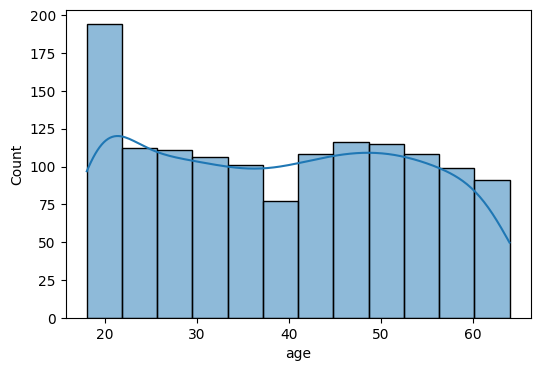

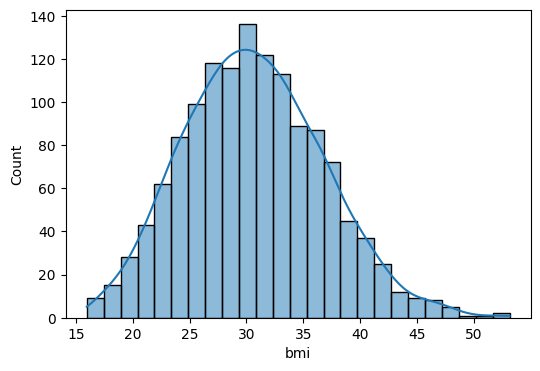

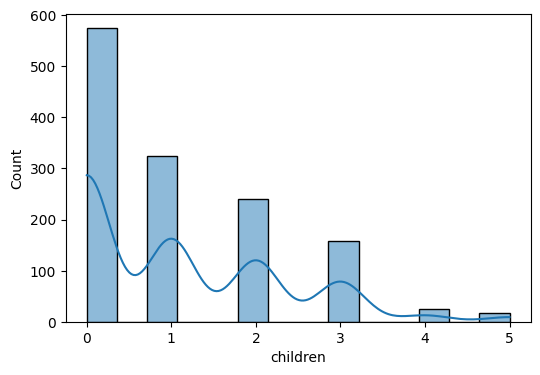

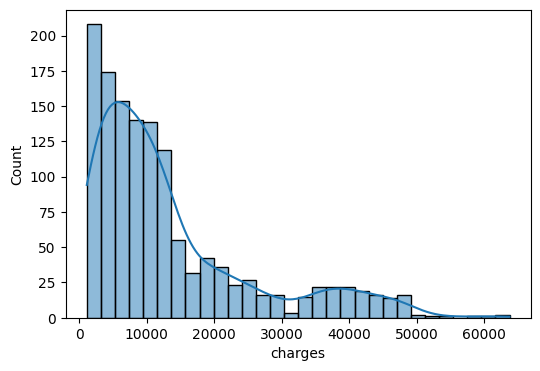

In [26]:
for col in numeric_cols :
    plt.figure( figsize=(6,4))
    sns.histplot(df[col] , kde=True) # type: ignore

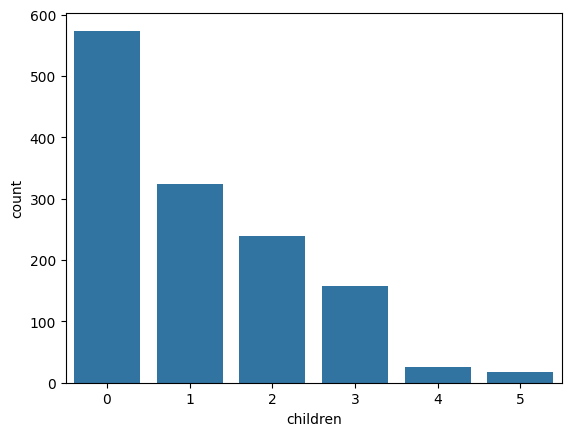

In [28]:
sns.countplot(x=df["children"])
plt.show()

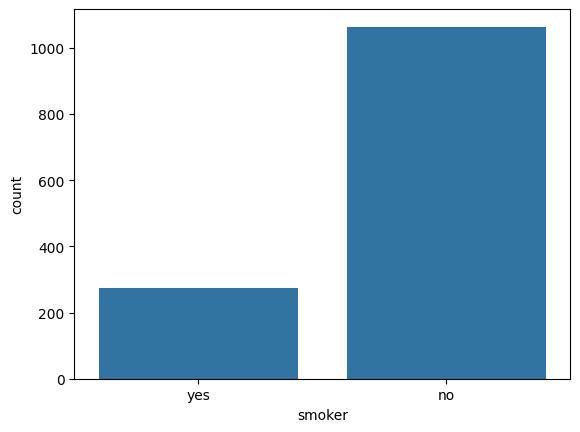

In [30]:
sns.countplot(x=df["smoker"])
plt.show()


### BOX PLOTS

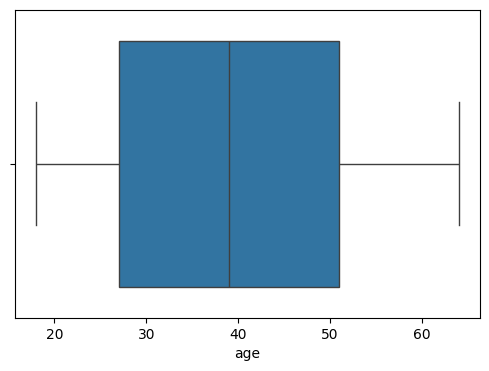

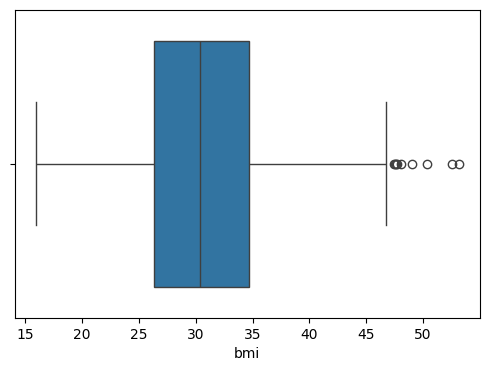

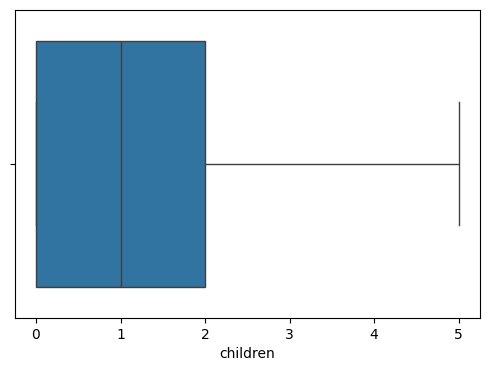

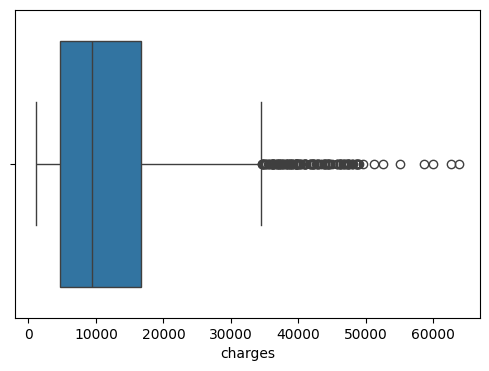

In [34]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])


### RELATION

<Axes: >

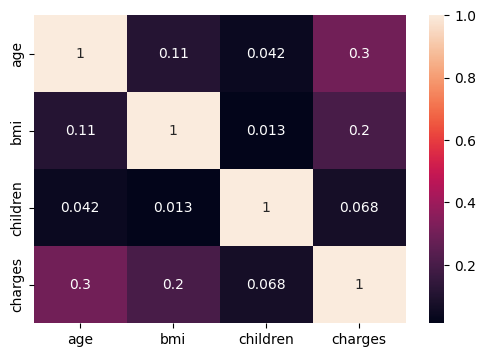

In [37]:
plt.figure( figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True) , annot=True)

## Data Cleaning and PreProcessing

In [48]:
df_cleaned = df.copy()
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.isnull().sum()
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Convert Object To Int

In [52]:
df_cleaned["sex"].value_counts()

sex
0    675
1    662
Name: count, dtype: int64

In [51]:
df_cleaned["sex"] = df_cleaned["sex"].map(({"male" : 0 , "female" : 1}))

In [55]:
df_cleaned["smoker"].value_counts()

smoker
0    1063
1     274
Name: count, dtype: int64

In [54]:
df_cleaned["smoker"] = df_cleaned["smoker"].map(({"no" : 0 , "yes" : 1}))

In [58]:
df_cleaned.rename(columns={"sex" :"is_female", "smoker" : "is_smoker" },inplace = True)
df_cleaned

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [62]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### One hot Encodnig

In [ ]:
df_cleaned = pd.get_dummies(df_cleaned, columns=["region"], drop_first=True)


Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [67]:
df_cleaned = df_cleaned.astype(int)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


## Feature Engineering and Feature Extraction

<Axes: xlabel='bmi', ylabel='Count'>

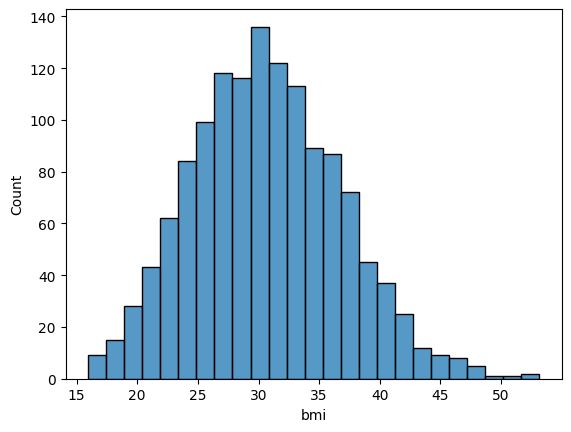

In [ ]:
sns.histplot(df["bmi"]) # type: ignore

In [69]:
df_cleaned["bmi_category"] = pd.cut(
    df_cleaned["bmi"],
    bins=[0, 18.5, 24.9, 29.9, float("inf")],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)


In [70]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [ ]:
df_cleaned = pd.get_dummies(df_cleaned, columns=["bmi_category"], drop_first=True)
df_cleaned = df_cleaned.astype(int)


In [75]:
df_cleaned = df_cleaned.astype(int)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


## Feature Scaling

In [76]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [81]:
cols = ['age' , 'bmi' , "children" ]
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [83]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [87]:
selected_features = ['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese']

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}

correlations_df = pd.DataFrame(list(correlations.items()) , columns=['Feature' ,'Pearson Correlation' ])
correlations_df.sort_values(by='Pearson Correlation' , ascending=False)

,Feature,Pearson Correlation
5,charges,1.000000
4,is_smoker,0.787234
0,age,0.298309
11,bmi_category_Obese,0.200348
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
6,region_northwest,-0.038695
8,region_southwest,-0.043637
1,is_female,-0.058046
